# Project: Investigate TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set I choose is the TMDb movie data set, which contains more than 10,000 movies collected from The Movie Database. 

This project will focus on the numeric data and their relationships, including revenue, budget, popularity, and vote rating of these movies.


Import the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Let's have a glimpse of our data:

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We can see that cast, genres, and production companies columns contains multiple values separated by '|'. Besides, the release date column has a pattern of month/day/year.

In [3]:
df.genres.head()  

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [4]:
df.genres.tail(10)

10856                       Comedy|Drama|Family
10857                            Action|Western
10858                                Comedy|War
10859    Mystery|Science Fiction|Thriller|Drama
10860                                    Comedy
10861                               Documentary
10862                    Action|Adventure|Drama
10863                            Mystery|Comedy
10864                             Action|Comedy
10865                                    Horror
Name: genres, dtype: object

In [5]:
df.production_companies.head()

0    Universal Studios|Amblin Entertainment|Legenda...
1    Village Roadshow Pictures|Kennedy Miller Produ...
2    Summit Entertainment|Mandeville Films|Red Wago...
3            Lucasfilm|Truenorth Productions|Bad Robot
4    Universal Pictures|Original Film|Media Rights ...
Name: production_companies, dtype: object

We can just leave them here, explore the shape and other attributes of the data set first. We will deal with these columns later.

Check the shape of our data:

In [6]:
df.shape

(10866, 21)

Check basic information and nulls:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Check the unique numbers of the data set:

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can see that nearly half of the movies has no budget and no revenue. We may need to dig into these observations to see what is really going on.

In [10]:
df.query('budget == 0').head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


In [11]:
df.query('budget == 0').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 21 columns):
id                      5696 non-null int64
imdb_id                 5687 non-null object
popularity              5696 non-null float64
budget                  5696 non-null int64
revenue                 5696 non-null int64
original_title          5696 non-null object
cast                    5631 non-null object
homepage                1229 non-null object
director                5656 non-null object
tagline                 3488 non-null object
keywords                4534 non-null object
overview                5692 non-null object
runtime                 5696 non-null int64
genres                  5674 non-null object
production_companies    4802 non-null object
release_date            5696 non-null object
vote_count              5696 non-null int64
vote_average            5696 non-null float64
release_year            5696 non-null int64
budget_adj              5696 non-null fl

In [39]:
df.query('revenue == 0').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 48 to 10865
Data columns (total 16 columns):
id                      6016 non-null int64
popularity              6016 non-null float64
budget                  6016 non-null int64
revenue                 6016 non-null int64
original_title          6016 non-null object
director                5973 non-null object
keywords                6016 non-null object
runtime                 6016 non-null int64
genres                  6016 non-null object
production_companies    6016 non-null object
release_date            6016 non-null object
vote_count              6016 non-null int64
vote_average            6016 non-null float64
release_year            6016 non-null int64
budget_adj              6016 non-null float64
revenue_adj             6016 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 799.0+ KB


These movies looks normal, I can't really get a hint from them, the zero budget may be a kind of missing value, or it may has no budget at the first place. Anyway, since I have no information how these zeros are from, I just gonna keep the data as it was.

### Data Cleaning (Replace this with more specific notes!)

For now, we can see that there is a column named keyword that has not been checked in the head function, we need to have a look at it.

In [12]:
df.keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

We can see that in genres, keywords, and production companies columns, the strings in each column is not alphabetic ordered, they are more of a importance order. Besides, we can see that some of these columns have only one string. So, I will cut off the others, leave only the first string in these three columns.

In [13]:
trim_columns = ['keywords', 'genres', 'production_companies']

for col in trim_columns:
    df[col] = df[col].astype(str)

In [14]:

for col in trim_columns:
    df[col] = df[col].apply(lambda x: x.split('|')[0])

In [15]:
df.head()[['keywords','genres','production_companies']]

,keywords,genres,production_companies
0,monster,Action,Universal Studios
1,future,Action,Village Roadshow Pictures
2,based on novel,Adventure,Summit Entertainment
3,android,Action,Lucasfilm
4,car race,Action,Universal Pictures


We can check how many unique values in these columns:

In [16]:
df.nunique()[['keywords','genres','production_companies']]

keywords                2309
genres                    21
production_companies    3058
dtype: int64

Drop some columns that we are not going to analyze:

In [17]:
df.drop(["imdb_id", "cast", "homepage", "tagline", "overview"], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
keywords                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


Check missing values:

In [19]:
df.isnull().sum(axis=0)

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
director                44
keywords                 0
runtime                  0
genres                   0
production_companies     0
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

Only director column has 44 missing values.

<a id='eda'></a>
## Exploratory Data Analysis

Discover the distributions of some columns which contains numeric values.

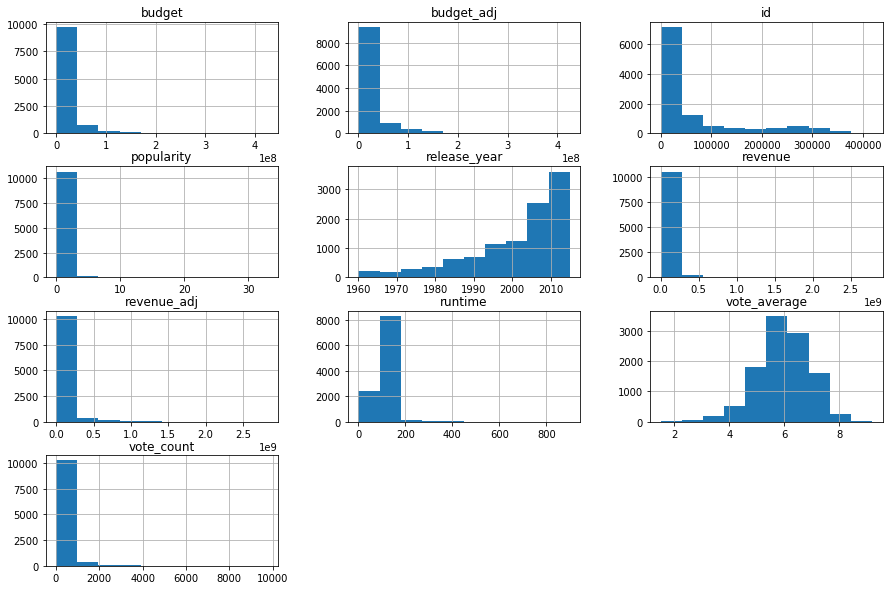

In [20]:
df.hist(figsize=(15, 10));

We can see that budget, popularity, revenue, runtime, and vote_count are right skewed. Vote_average is nearly a normal distribution.

We can also check the scatter plots of budget, vote, revenue, and popularity to see if they have any connections.

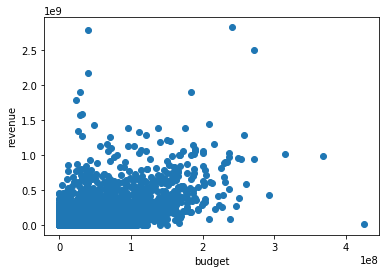

In [50]:
plt.scatter(df.budget_adj, df.revenue_adj)
plt.xlabel("budget")
plt.ylabel("revenue");

Seems like there is a weak and positive correlation between budget and revenue.

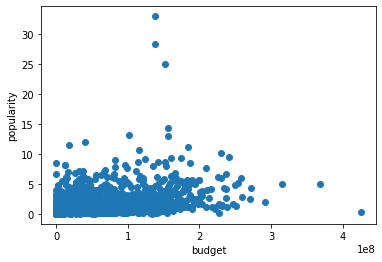

In [51]:
plt.scatter(df.budget_adj, df.popularity)
plt.xlabel("budget")
plt.ylabel("popularity");

Seems like there is a weak and positive correlation between budget and popularity.

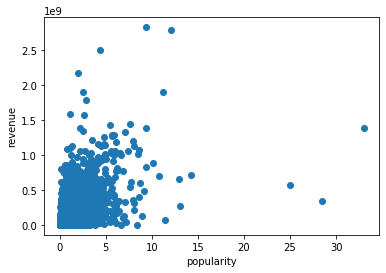

In [52]:
plt.scatter(df.popularity, df.revenue_adj)
plt.xlabel("popularity")
plt.ylabel("revenue");

This plot shows a medium positive correlation between popularity and revenue.

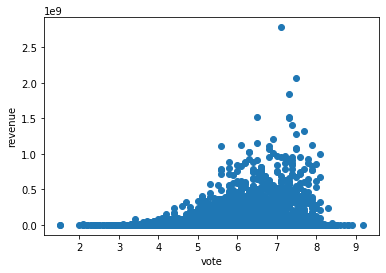

In [57]:
plt.scatter(df.vote_average, df.revenue)
plt.xlabel("vote")
plt.ylabel("revenue");

Very weak correlation between vote and revenue.

### Does the average vote of movies differ in different decades?

Seeing all these data, the first question I think about is that is there a trend in the vote of movies in different decades?

In [69]:
vote_avg_decade = df.groupby((df.release_year//10)*10).mean().vote_average
vote_avg_decade

release_year
1960    6.246133
1970    6.367323
1980    6.079398
1990    5.999263
2000    5.921224
2010    5.902745
Name: vote_average, dtype: float64

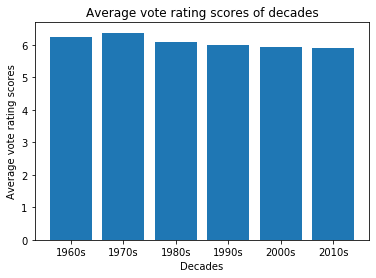

In [25]:
locations = [1, 2, 3, 4, 5, 6]
heights = vote_avg_decade
labels = ["1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]
plt.bar(locations, heights, tick_label = labels)
plt.title("Average vote rating scores of decades")
plt.xlabel("Decades")
plt.ylabel("Average vote rating scores");

From the bar plot, we can see that 

### Which genre of movie has the highest revenue on average?

As I keep thinking, which of the genres can achieving the highest revenue?

In [26]:
avg_revenue_genres = df.groupby(['genres'])['revenue_adj'].mean()
avg_revenue_genres

genres
Action             7.401006e+07
Adventure          1.665356e+08
Animation          7.671443e+07
Comedy             3.837766e+07
Crime              4.674641e+07
Documentary        2.150125e+06
Drama              3.578622e+07
Family             7.724863e+07
Fantasy            8.283760e+07
Foreign            0.000000e+00
History            6.536195e+07
Horror             2.417979e+07
Music              3.807907e+07
Mystery            3.002289e+07
Romance            4.721514e+07
Science Fiction    9.951810e+07
TV Movie           7.485782e+05
Thriller           3.096924e+07
War                4.874310e+07
Western            4.730739e+07
nan                0.000000e+00
Name: revenue_adj, dtype: float64

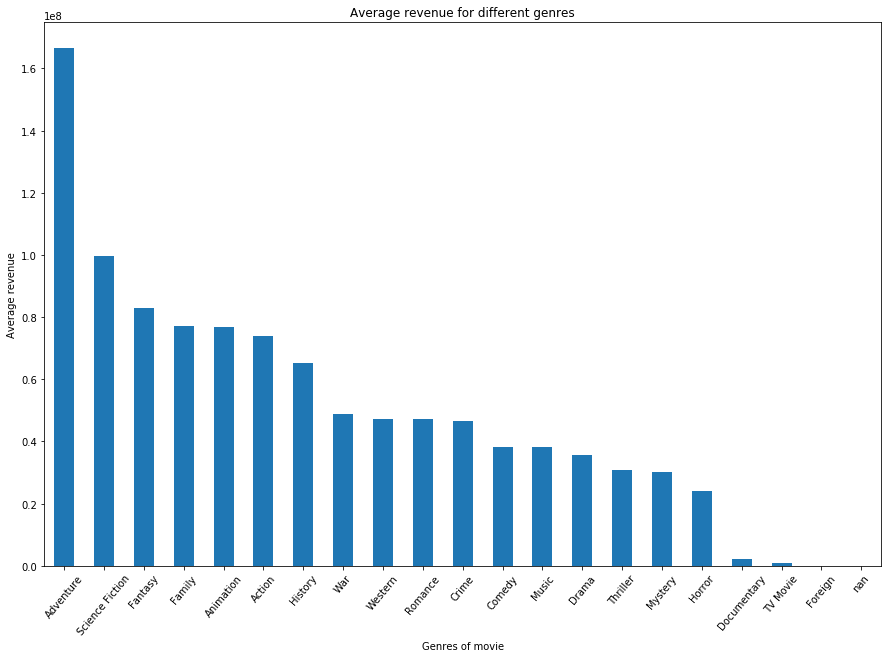

In [45]:
plt.figure(figsize=(15,10))
avg_revenue_genres.sort_values(ascending=False).plot.bar()
plt.title("Average revenue for different genres")
plt.xticks(rotation=50)
plt.xlabel("Genres of movie")
plt.ylabel("Average revenue");

We can also use box plot to dig into this problem a little deeper:

In [33]:
df_rev = df[['revenue_adj','genres']]

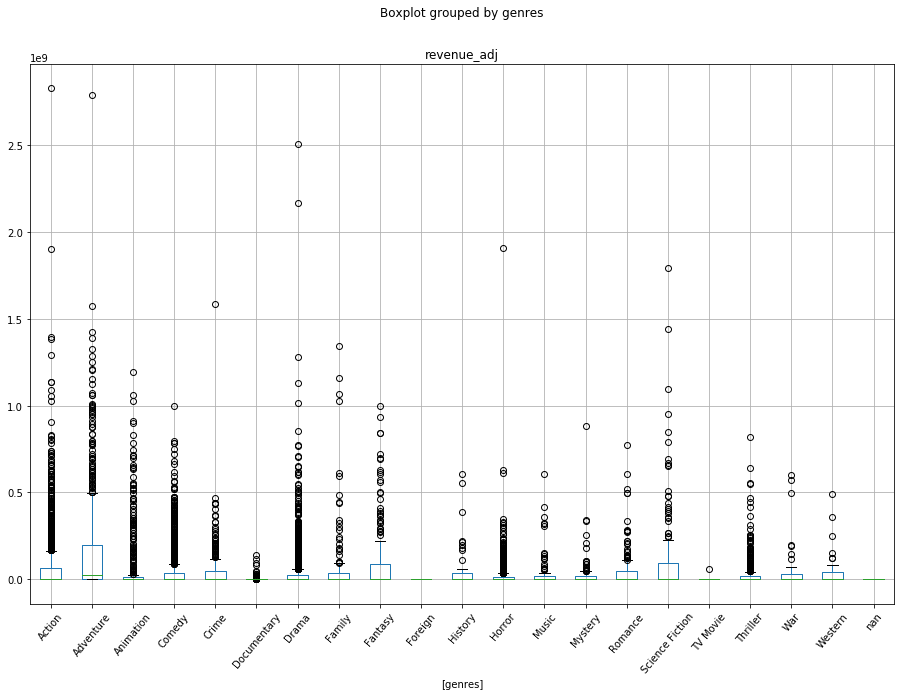

In [49]:
df_rev.boxplot(by = 'genres', figsize=(15,10),rot=50);

We can see that many genres have a median of zero, that may because half of the movies has a budget or revenue of 0.

### Which genre of movie has the highest popularity on average?

We can also explore the relationship between popularity and genres of movie:

In [41]:
avg_popularity_genres = df.groupby(['genres'])['popularity'].mean()
avg_popularity_genres

genres
Action             0.836394
Adventure          1.217868
Animation          0.810370
Comedy             0.537133
Crime              0.693807
Documentary        0.177023
Drama              0.552446
Family             0.730987
Fantasy            0.865390
Foreign            0.167124
History            0.764636
Horror             0.468611
Music              0.447730
Mystery            0.596896
Romance            0.704157
Science Fiction    1.073096
TV Movie           0.246190
Thriller           0.673381
War                0.767041
Western            0.690646
nan                0.167966
Name: popularity, dtype: float64

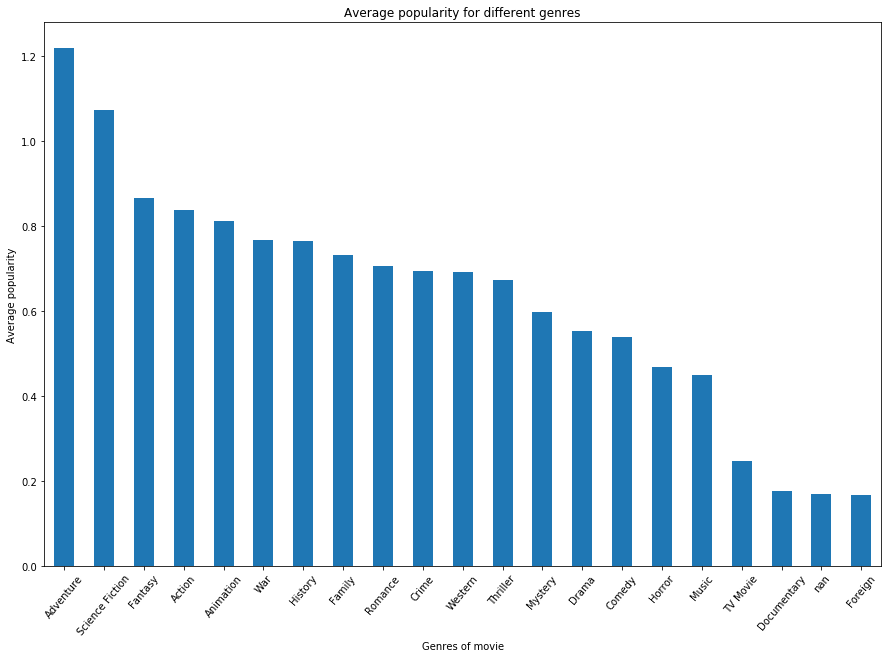

In [44]:
plt.figure(figsize=(15,10))
avg_popularity_genres.sort_values(ascending=False).plot.bar()
plt.title("Average popularity for different genres")
plt.xticks(rotation=50)
plt.xlabel("Genres of movie")
plt.ylabel("Average popularity");

The top 3 popular genres of movie are adventure, science fiction, and fantasy, which is the same as the top 3 places in the highest revenue plot. This finding just matches the correlation between popularity and revenue we found in the scatter plot.

### Which genre of movie has the highest vote?

In [54]:
avg_vote_genres = df.groupby(['genres'])['vote_average'].mean()
avg_vote_genres

genres
Action             5.752327
Adventure          6.052048
Animation          6.414888
Comedy             5.882924
Crime              6.214436
Documentary        6.923380
Drama              6.200448
Family             5.945833
Fantasy            5.795956
Foreign            5.900000
History            6.381818
Horror             5.318798
Music              6.605000
Mystery            5.900800
Romance            6.133871
Science Fiction    5.963551
TV Movie           5.793590
Thriller           5.634420
War                6.183051
Western            6.080952
nan                6.421739
Name: vote_average, dtype: float64

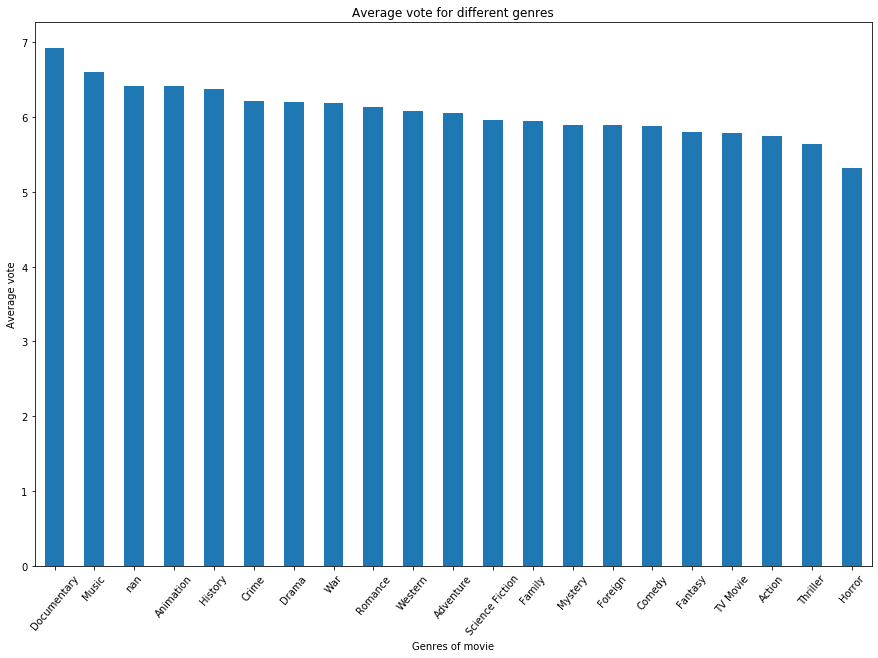

In [55]:
plt.figure(figsize=(15,10))
avg_vote_genres.sort_values(ascending=False).plot.bar()
plt.title("Average vote for different genres")
plt.xticks(rotation=50)
plt.xlabel("Genres of movie")
plt.ylabel("Average vote");

This plot is different from both revenue and popularity plot. People tend to give high vote to documentary, music, and animation genres, instead of adventrue, science fiction, and fantasy genres.

### Which production company has the highest revenue on average?

After thinking about genres of movies, we can also check which production company in the data set is the one that can make the highest revenue on average.

In [ ]:
avg_revenue_genres = df.groupby(['genres'])['revenue_adj'].mean()
plt.figure(figsize=(15,10))
avg_vote_genres.sort_values(ascending=False).plot.bar()
plt.title("Average vote for different genres")
plt.xticks(rotation=50)
plt.xlabel("Genres of movie")
plt.ylabel("Average vote");

In [70]:
avg_revenue_companies = df.groupby(['production_companies'])['revenue_adj'].mean()
avg_revenue_companies.sort_values(ascending=False).head(20)

production_companies
Robert Wise Productions                     1.129535e+09
Patalex IV Productions Limited              1.000353e+09
Cool Music                                  9.866889e+08
1492 Pictures                               8.351229e+08
Lucasfilm                                   6.837816e+08
Barwood Films                               6.169034e+08
Eon Productions                             5.583549e+08
WingNut Films                               5.167232e+08
Horizon Pictures (II)                       5.045914e+08
Bookshop Productions                        4.763508e+08
MPH Entertainment                           4.470142e+08
Bryna Productions                           4.423780e+08
Lightstorm Entertainment                    4.219789e+08
Great American Films Limited Partnership    4.105955e+08
Laura Ziskin Productions                    3.664077e+08
Blue Sky Studios                            3.457255e+08
Camelot Productions                         3.288733e+08
Red Lion  

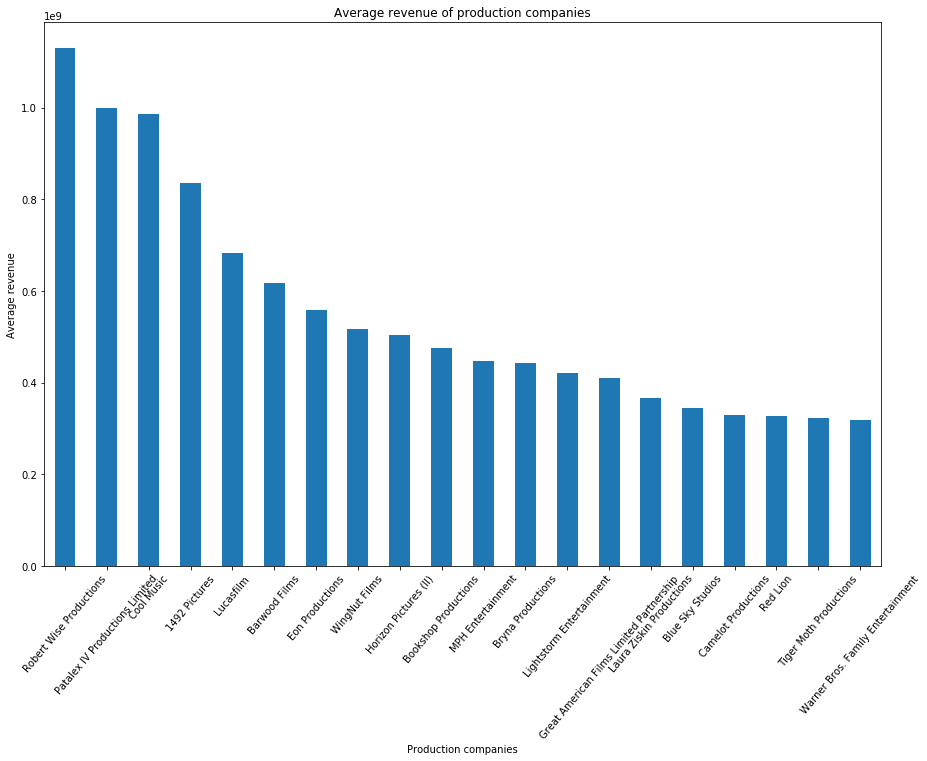

In [68]:
plt.figure(figsize=(15,10))
avg_revenue_companies.sort_values(ascending=False).head(20).plot.bar()
plt.title("Average revenue of production companies")
plt.xticks(rotation=50)
plt.xlabel("Production companies")
plt.ylabel("Average revenue");

The top three production companies that earned the highest money from the film industry are Robert Wise productions, Patalex IV Productions Limited, and Cool Music. This result may be arbitrary because I only included the first production company showes in the production company column.

<a id='conclusions'></a>
## Conclusions

In this project, I investigated the TMDb movie data set by doing some exploratory analysis. I cleaned the data set by removing some of the columns that is not of my interest, and trimmed the data by keeping only the first value in keywords, genres, and production companies column. 

In the exploratory analysis part, I proposed five questioins. 

The first one is does the average vote of movies differ in different decades? By plotting the average vote of different decades, we found that the average vote of 1970s is the highest (average vote = 6.37), and after that decade, the average vote is keeping decreasing (average vote of 1980s = 6.08; average vote of 1990s = 6.00; average vote of 2000s = 5.92; average of 2010s = 5.90). 

The second question is which genre of movie has the highest revenue on average? The genres of the movie used here is the first genres in the genres column, although I checked it is not alphabetic, it is still not the whole image of the data set. With that limitation, I ploted average adjusted revenue for different genres. From the plot we can see that adventure (average revenue = 1.66e8), science fiction (average revenue = 9.95e7), and fantasy (8.28e7) are the top 3 money-earning genres on average.

The third question is which genre of movie has the highest popularity on average? The answer to this question has the same limitation as the second question. From the plot, we can conclude that the top three popular genres is just as same as the three with highest revenue: adventrue (average popularity = 1.22), science fictioin (average popularity = 1.07), and fantasy (average popularity = 0.87). Other columns in the plot has some difference compared to the revenue by genres plot, but still, they are quite similar.

The fourth question is which genre of movie has the highest vote? This time, the answer is quite different from the second and third question. Documentary (average vote = 6.92), music (average vote = 6.61), and animation (average vote = 6.41) (I exclude the nan column because it represents no category). 

The last quesiton is which production company has the highest revenue on average? The answer to this questioin has the similar limitation as the second, third, and fourth question that I only included the first production company in the list. The top three money-earning companies are Robert Wise Productions (average revenue = 1.13e9), Patalex IV Productions Limited (average revenue = 1.00e9), and Cool Music (average revenue = 9.87e8). 

With limitation on my data analysis skill, these five questions and their answer is what I did for this project. However, there is still a lot to find in this TMDb data set.